In [63]:
# from google.colab import files

# # files.upload()

In [64]:
# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

In [65]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [66]:
# !kaggle competitions download 'titanic'

In [67]:
# !unzip titanic.zip

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot
import missingno
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/titanic/train.csv
/content/titanic/test.csv
/content/titanic/gender_submission.csv


In [69]:
train_data = pd.read_csv("/content/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
test_data = pd.read_csv("/content/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [73]:
def convInt(dframe):
  return dframe.apply(np.floor)
train_data['Age'] = convInt(train_data['Age'])
test_data['Age'] = convInt(test_data['Age'])
test_data['Age']

0      34.0
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.0
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

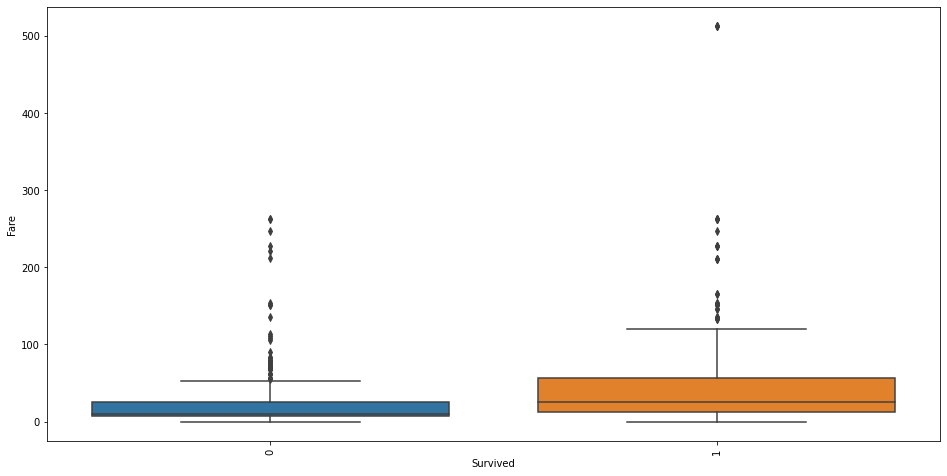

In [74]:
data = pd.concat([train_data['Survived'], train_data['Fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train_data['Survived'], y=train_data['Fare'], data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [75]:
Q1,Q3 = np.percentile(train_data['Fare'] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
Q1, Q3, ul, ll

(7.9104, 31.0, 65.6344, -26.724)

In [76]:
outlier_indx = train_data['Fare'][(train_data['Fare'] > ul) | (train_data['Fare'] < ll)].index

for i in outlier_indx:
  train_data['Fare'][i] = np.nan
  # print(train_data['Fare'][i]

<ipython-input-76-a2eee488a7e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'][i] = np.nan


In [77]:
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [78]:
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [79]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royal",
    "Don":        "Royal",
    "Sir" :       "Royal",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royal",
    "Dona":       "Royal",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royal"
}
# map the normalized titles to the current titles for train and test data.
train_data.Title = train_data.Title.map(normalized_titles)
test_data.Title = test_data.Title.map(normalized_titles)
# y_test.Title = y_test.Title.map(normalized_titles)

In [80]:
train_data.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

In [81]:
test_data.Title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royal        1
Name: Title, dtype: int64

In [82]:
from sklearn.impute import KNNImputer
# tt_data = test_data.copy()
cat_variables_test = test_data[['Sex', 'Embarked', 'Title']]
cat_dummies_test = pd.get_dummies(cat_variables_test, drop_first=True)
cat_dummies_test.head()

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,1,1,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0
2,1,1,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0
4,0,0,1,0,0,1,0,0


In [83]:
from sklearn.impute import KNNImputer
# t_data = train_data.copy()
cat_variables = train_data[['Sex', 'Embarked', 'Title']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0
3,0,0,1,0,0,1,0,0
4,1,0,1,0,1,0,0,0


In [84]:

test_data.drop('Cabin',inplace=True, axis=1)
test_data.drop('Name',inplace=True, axis=1)
test_data.drop('Ticket',inplace=True, axis=1)

test_data = test_data.drop(['Sex', 'Embarked', 'Title'], axis=1)
test_data = pd.concat([test_data, cat_dummies_test], axis=1)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,892,3,34.0,0,0,7.8292,1,1,0,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,1,0,0


In [85]:

train_data.drop('Cabin',inplace=True, axis=1)
train_data.drop('Name',inplace=True, axis=1)
train_data.drop('Ticket',inplace=True, axis=1)

train_data = train_data.drop(['Sex', 'Embarked', 'Title'], axis=1)
train_data = pd.concat([train_data, cat_dummies], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,1,0,3,22.0,1,0,7.250,1,0,1,0,1,0,0,0
1,2,1,1,38.0,1,0,NaN,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.925,0,0,1,1,0,0,0,0
3,4,1,1,35.0,1,0,53.100,0,0,1,0,0,1,0,0
4,5,0,3,35.0,0,0,8.050,1,0,1,0,1,0,0,0


In [86]:
# train_data['Family'] = train_data['SibSp'] + train_data['Parch']

# train_data = train_data.drop(['Parch', 'SibSp'], axis=1)

# train_data.head()

In [87]:
# test_data['Family'] = test_data['SibSp'] + test_data['Parch']

# test_data = test_data.drop(['Parch', 'SibSp'], axis=1)

# test_data.head()

In [88]:
y = train_data['Survived']
# y_test = test_data['Survived']

train_data = train_data.drop(['Survived'], axis=1)
# test_data = test_data.drop(['Survived'], axis=1)

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data), columns = train_data.columns)
train_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0.000000,1.0,0.2750,0.125,0.0,0.111538,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.001124,0.0,0.4750,0.125,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.3250,0.000,0.0,0.121923,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.003371,0.0,0.4375,0.125,0.0,0.816923,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.004494,1.0,0.4375,0.000,0.0,0.123846,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [90]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)
# test_data.drop('Title',inplace=True, axis=1)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0.000000,1.0,0.447368,0.000,0.000000,0.015282,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002398,1.0,0.618421,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.004796,0.5,0.815789,0.000,0.000000,0.018909,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.007194,1.0,0.355263,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.009592,1.0,0.289474,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [91]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_data = pd.DataFrame(imputer.fit_transform(train_data),columns = train_data.columns)
train_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0.000000,1.0,0.2750,0.125,0.0,0.111538,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.001124,0.0,0.4750,0.125,0.0,0.581423,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.3250,0.000,0.0,0.121923,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.003371,0.0,0.4375,0.125,0.0,0.816923,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.004494,1.0,0.4375,0.000,0.0,0.123846,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [92]:
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
test_data = pd.DataFrame(imputer.fit_transform(test_data),columns = test_data.columns)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0.000000,1.0,0.447368,0.000,0.000000,0.015282,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002398,1.0,0.618421,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.004796,0.5,0.815789,0.000,0.000000,0.018909,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.007194,1.0,0.355263,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.009592,1.0,0.289474,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [93]:
from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

X= train_data
X_test=test_data
# X = X.drop("Survived", axis=1)
X = X.drop("PassengerId", axis=1)
X_test = X_test.drop("PassengerId", axis=1)


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
histry = model.fit(X, y)

In [132]:
from sklearn import metrics

model = RandomForestClassifier( criterion="gini", max_depth=14, n_estimators=90,
                             random_state=1, n_jobs=-1)
model.fit(X, y)
model1 = RandomForestClassifier()
model1.fit(X, y)
model3 =  RandomForestClassifier(random_state=42, n_jobs=-1)
model3.fit(X, y)
print('Training Accuracy : ',
      metrics.accuracy_score(y,
                             model.predict(X))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_pred['Survived'],
                             model.predict(X_test))*100)

print('Training Accuracy1 : ',
      metrics.accuracy_score(y,
                             model1.predict(X))*100)
print('Validation Accuracy1 : ',
      metrics.accuracy_score(y_pred['Survived'],
                             model1.predict(X_test))*100)

print('Training Accuracy3 : ',
      metrics.accuracy_score(y,
                             model3.predict(X))*100)

print('Validation Accuracy3 : ',
      metrics.accuracy_score(y_pred['Survived'],
                             model3.predict(X_test))*100)

Training Accuracy :  96.8574635241302
Validation Accuracy :  82.53588516746412
Training Accuracy1 :  98.54096520763187
Validation Accuracy1 :  79.42583732057416
Training Accuracy3 :  98.54096520763187
Validation Accuracy3 :  77.27272727272727


In [153]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X, y)

#Predict the response for test dataset
y_pred1 = knn.predict(X_test)

In [154]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred1, y_pred['Survived']))

Accuracy: 0.9138755980861244


In [95]:
predictions = model.predict(X_test)
predictions1 = model1.predict(X_test)
# predictions, titanic_Ytest['Survived']

In [96]:
print (model.score(X, y))
print (model1.score(X, y))

0.9685746352413019
0.9854096520763187


In [124]:
y_pred = pd.read_csv("/content/titanic/gender_submission.csv")

In [98]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

print(classification_report(y_pred['Survived'], predictions))

print(classification_report(y_pred['Survived'], predictions1))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       266
           1       0.76      0.73      0.74       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



In [99]:
print(classification_report(y_pred['Survived'], predictions))

print(classification_report(y_pred['Survived'], predictions1))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       266
           1       0.76      0.73      0.74       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



In [133]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_pred['Survived'], y_pred_proba)

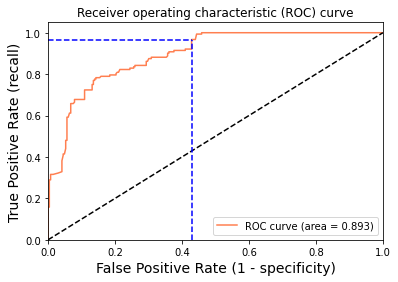

Using a threshold of 0.222 guarantees a sensitivity of 0.967 and a specificity of 0.571, i.e. a false positive rate of 42.86%.


In [134]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [128]:

from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}


results = cross_validate(model, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(model.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
RandomForestClassifier average accuracy: 0.822 (+/-0.043)
RandomForestClassifier average log_loss: 0.479 (+/-0.128)
RandomForestClassifier average auc: 0.860 (+/-0.057)


In [143]:


rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [137]:
grid_search1 = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

Fitting 4 folds for each of 120 candidates, totalling 480 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


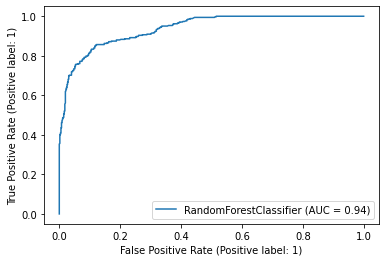

CPU times: user 719 ms, sys: 58.7 ms, total: 777 ms
Wall time: 25.4 s


In [138]:
%%time
grid_search1.fit(X, y)

grid_search1.best_score_



rf_best = grid_search1.best_estimator_
rf_best

plot_roc_curve(rf_best, X, y)
plt.show()

Fitting 4 folds for each of 120 candidates, totalling 480 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


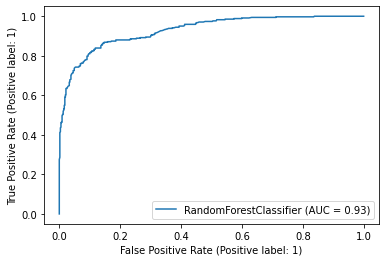

CPU times: user 716 ms, sys: 19.7 ms, total: 736 ms
Wall time: 25.1 s


In [144]:
%%time
grid_search.fit(X, y)

grid_search.best_score_



rf_best = grid_search.best_estimator_
rf_best

plot_roc_curve(rf_best, X, y)
plt.show()

In [145]:
# Let's see the features by importance

rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

AttributeError: ignored

In [141]:
print('Accuracy of Random Forest on the testing dataset is :{:.3f}'.format(rf_best.score(X,y)))

print('Accuracy of Random Forest on the testing dataset is :{:.3f}'.format(rf_best.score(X_test,y_pred['Survived'])))

Accuracy of Random Forest on the testing dataset is :0.869
Accuracy of Random Forest on the testing dataset is :0.938


In [104]:
from xgboost import XGBClassifier

xgb_base = XGBClassifier()
xgb_base.fit(X, y)

XGBClassifier()

In [105]:

from sklearn.metrics import classification_report

y_train_pred = xgb_base.predict(X)
y_test_pred = xgb_base.predict(X_test)

print(classification_report(y_pred['Survived'], y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.89       266
           1       0.89      0.64      0.75       152

    accuracy                           0.84       418
   macro avg       0.86      0.80      0.82       418
weighted avg       0.85      0.84      0.84       418



In [106]:


# grid search
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [107]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.393836 using {'max_depth': 4, 'n_estimators': 50}
-0.411134 (0.040371) with: {'max_depth': 2, 'n_estimators': 50}
-0.408879 (0.048296) with: {'max_depth': 2, 'n_estimators': 100}
-0.405140 (0.050270) with: {'max_depth': 2, 'n_estimators': 150}
-0.404184 (0.050519) with: {'max_depth': 2, 'n_estimators': 200}
-0.393836 (0.047410) with: {'max_depth': 4, 'n_estimators': 50}
-0.397017 (0.057880) with: {'max_depth': 4, 'n_estimators': 100}
-0.401468 (0.059748) with: {'max_depth': 4, 'n_estimators': 150}
-0.410663 (0.066270) with: {'max_depth': 4, 'n_estimators': 200}
-0.399209 (0.060450) with: {'max_depth': 6, 'n_estimators': 50}
-0.412414 (0.071429) with: {'max_depth': 6, 'n_estimators': 100}
-0.426034 (0.083631) with: {'max_depth': 6, 'n_estimators': 150}
-0.440357 (0.090273) with: {'max_depth': 6, 'n_estimators': 200}
-0.410994 (0.058617) with: {'max_depth': 8, 'n_estimators': 50}
-0.426819 (0.073915) with: {'max_depth': 8, 'n_estimators': 100}
-0.447199 (0.083345) with: {'max_de

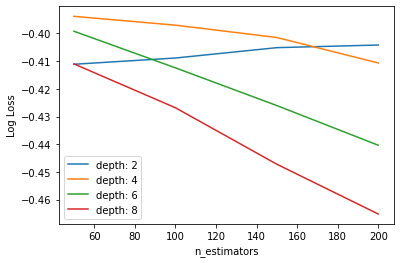

In [108]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

In [109]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [110]:
model_cv.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=150),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [111]:
# Store the result in the dataframe

cv_results = pd.DataFrame(model_cv.cv_results_)
# Pulling out the best model

xgb_best = model_cv.best_estimator_
#Let's see inside the best xgb model

xgb_best

XGBClassifier(max_depth=2, n_estimators=150, subsample=0.9)

In [112]:
# Let's check the feature importance
importance = dict(zip(X.columns, xgb_best.feature_importances_))
importance

{'Pclass': 0.09587966,
 'Age': 0.028193085,
 'SibSp': 0.0442081,
 'Parch': 0.018638775,
 'Fare': 0.031125167,
 'Sex_male': 0.31054667,
 'Embarked_Q': 0.009041067,
 'Embarked_S': 0.037413545,
 'Title_Miss': 0.0,
 'Title_Mr': 0.39026666,
 'Title_Mrs': 0.01844919,
 'Title_Officer': 0.016238138,
 'Title_Royal': 0.0}

In [113]:
print('Accuracy of XGB the testing dataset is :{:.3f}'.format(xgb_best.score(X_test,y_pred['Survived'])))

Accuracy of XGB the testing dataset is :0.840


In [114]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

dt_base.fit(X, y)

y_train_pred = dt_base.predict(X)
y_test_pred = dt_base.predict(X_test)

print(classification_report(y_pred['Survived'], y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       266
           1       0.76      0.39      0.52       152

    accuracy                           0.73       418
   macro avg       0.74      0.66      0.67       418
weighted avg       0.74      0.73      0.71       418



In [115]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler, PowerTransformer
scaler = PowerTransformer().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, test_size=.3, shuffle=True, random_state=10)

In [117]:
from sklearn.svm import SVC
svc_model = SVC(kernel='poly', degree=1)
svc_model.fit(xtrain,ytrain)
yvpred = svc_model.predict(xvalid)
ytpred = svc_model.predict(X_test)

In [118]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0.000000,1.0,0.447368,0.000,0.000000,0.015282,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002398,1.0,0.618421,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.004796,0.5,0.815789,0.000,0.000000,0.018909,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.007194,1.0,0.355263,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.009592,1.0,0.289474,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.376316,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
414,0.992806,0.0,0.513158,0.000,0.000000,0.212559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415,0.995204,1.0,0.500000,0.000,0.000000,0.014151,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
416,0.997602,1.0,0.376316,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [119]:
print('Classification Report'.center(70,'-'), '\n')
print(classification_report(yvalid,yvpred))    
print('-'*70,'\n')
print(f'The accurecy of validation data is {round(accuracy_score(yvalid,yvpred)*100,2)}%')   
print('='*70,'\n')
print(' Test Result '.center(70,'-'), '\n')
titanic_Ytest =  pd.read_csv('/content/titanic/gender_submission.csv', index_col='PassengerId')
print(confusion_matrix(titanic_Ytest,ytpred), '\n')
print(f'The accurecy of test data is {round(accuracy_score(titanic_Ytest,ytpred)*100,2)}%')

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       174
           1       0.74      0.69      0.71        94

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268

---------------------------------------------------------------------- 

The accurecy of validation data is 80.6%

---------------------------- Test Result ----------------------------- 

[[266   0]
 [  0 152]] 

The accurecy of test data is 100.0%
